In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolfrom pathlib import Pathkit and Object Relational Mapper
from pathlib import Path
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurment = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(measurment.date).order_by(measurment.date.desc()).first()

#output:
#('2017-08-23',)

('2017-08-23',)

C:\Users\Admin\anaconda3\envs\pyData2\lib\site-packages\ipykernel_launcher.py:26: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>


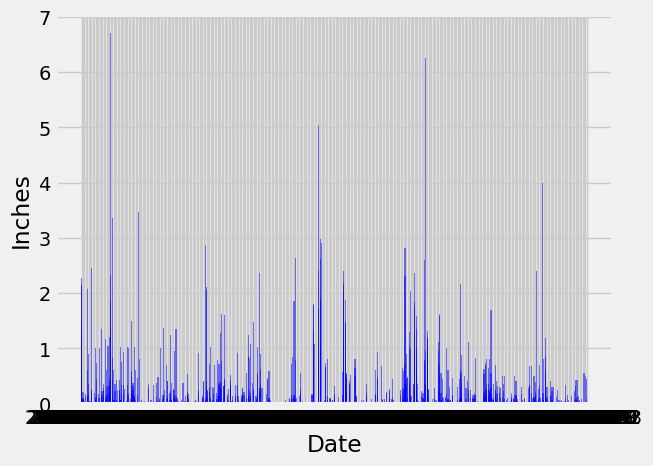

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last_date = session.query(measurment.date).order_by(measurment.date.desc()).first()

# Calculate the date one year from the last date in data set.
# Manually entered Date format based on last output
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
last_search = session.query(*[measurment.date, measurment.prcp]).\
    filter(measurment.date > last_year).\
    order_by(measurment.date).all()
last_search

# Save the query results as a Pandas DataFrame. Explicitly set the column names
search_df = pd.DataFrame(last_search, columns=['date','prcp'])
#search_df.set_index('date', inplace=True)

# Sort the dataframe by date
search_df = search_df.sort_values("date", ascending=True)
search_df = search_df.reset_index(drop=True)

# Use Pandas Plotting with Matplotlib to plot the data

plt.bar(search_df['date'], search_df['prcp'], color='b', alpha=0.5, align="center")
plt.locator_params(axis = "x", nbins=12)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()

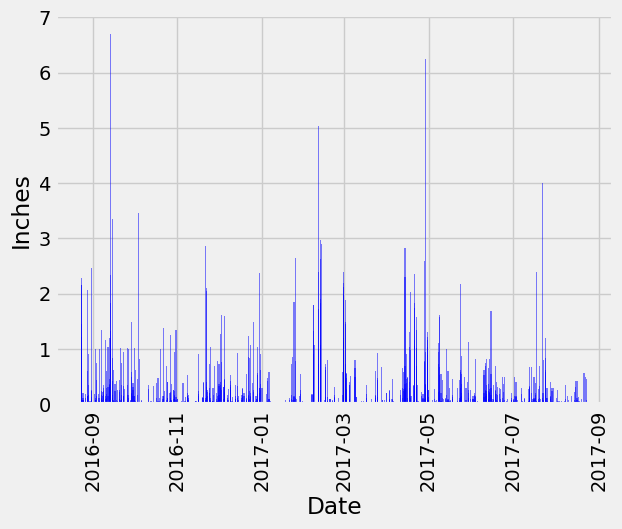

In [11]:
#fig, ax = plt.subplots(1, 2, figsize=(6, 2.5))
x = search_df['date']
y = search_df['prcp']
#x_tick = ['2016-08-23','2016-10-01','2016-11-09","2016-12-19', '2017-01-28', '2017-03-09', '2017-04-28', '2017-05-31', '2017-07-10']
x = np.asarray(x, dtype='datetime64[s]')
#tick_locations = [value for value in x_tick]
plt.bar(x, y, color='b', alpha=0.5, align="center")
#plt.xticks(tick_locations, x, rotation="vertical")
plt.xticks(rotation="vertical")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
search_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset

#output
#[(9,)]

In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

#output
#[('USC00519281', 2772),
 #('USC00519397', 2724),
 #('USC00513117', 2709),
 #('USC00519523', 2669),
 #('USC00516128', 2612),
 #('USC00514830', 2202),
 #('USC00511918', 1979),
 #('USC00517948', 1372),
 #('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

#output
#[(54.0, 85.0, 71.66378066378067)]

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [17]:
# Close Session
session.close()